<a href="https://colab.research.google.com/github/Sourav61/Goeduhub-Assignments/blob/main/Task_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Author: <a href = "https://github.com/Sourav61">Sourav Pahwa</a>
<br>ID: GO_STP_13420

In [ ]:
#@title Predict Loan Eligibility for Dream Housing Finance company
print("""
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home 
loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are
Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset 
to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

[Dataset Link]("https://www.kaggle.com/ninzaami/loan-predication") """)


Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home 
loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are
Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset 
to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

[Dataset Link]("https://www.kaggle.com/ninzaami/loan-predication") 


In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [76]:
df = pd.read_csv("loan_approval.csv")

In [77]:
df['Loan_Status'] = df['Loan_Status'].apply({'Y':1, 'N':0}.get)

In [78]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0


In [79]:
df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,1
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,0
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,1
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,1
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,1
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [81]:
df.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614.000000
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,NaN
top,LP001333,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,NaN
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,0.687296
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,0.463973
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,1.000000


In [82]:
df.describe().style.background_gradient(cmap='PuBu_r', low=0, high=0, axis=0, subset=None, text_color_threshold=0.408, vmin=None, vmax=None)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.000000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.120410,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [83]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(df)

,Data Type,No of Levels,Levels
Loan_ID,object,614,['LP001002' 'LP001003' 'LP001005' 'LP001006' '...
Gender,object,2,['Male' 'Female' nan]
Married,object,2,['No' 'Yes' nan]
Dependents,object,4,['0' '1' '2' '3+' nan]
Education,object,2,['Graduate' 'Not Graduate']
Self_Employed,object,2,['No' 'Yes' nan]
ApplicantIncome,int64,505,[ 5849 4583 3000 2583 6000 5417 2333 30...
CoapplicantIncome,float64,287,[0.00000000e+00 1.50800000e+03 2.35800000e+03 ...
LoanAmount,float64,203,[ nan 128. 66. 120. 141. 267. 95. 158. 168. ...
Loan_Amount_Term,float64,10,[360. 120. 240. nan 180. 60. 300. 480. 36. ...


In [84]:
df.kurt()

ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
Loan_Status          -1.348306
dtype: float64

In [85]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
Loan_Status         -0.809998
dtype: float64

In [86]:
df.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [87]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [88]:
df.axes

[RangeIndex(start=0, stop=614, step=1),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object')]

In [94]:
df.items

<bound method DataFrame.items of       Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
0    LP001002    Male      No  ...            1.0         Urban           1
1    LP001003    Male     Yes  ...            1.0         Rural           0
2    LP001005    Male     Yes  ...            1.0         Urban           1
3    LP001006    Male     Yes  ...            1.0         Urban           1
4    LP001008    Male      No  ...            1.0         Urban           1
..        ...     ...     ...  ...            ...           ...         ...
609  LP002978  Female      No  ...            1.0         Rural           1
610  LP002979    Male     Yes  ...            1.0         Rural           1
611  LP002983    Male     Yes  ...            1.0         Urban           1
612  LP002984    Male     Yes  ...            1.0         Urban           1
613  LP002990  Female      No  ...            0.0     Semiurban           0

[614 rows x 13 columns]>

In [95]:
df.ndim

2

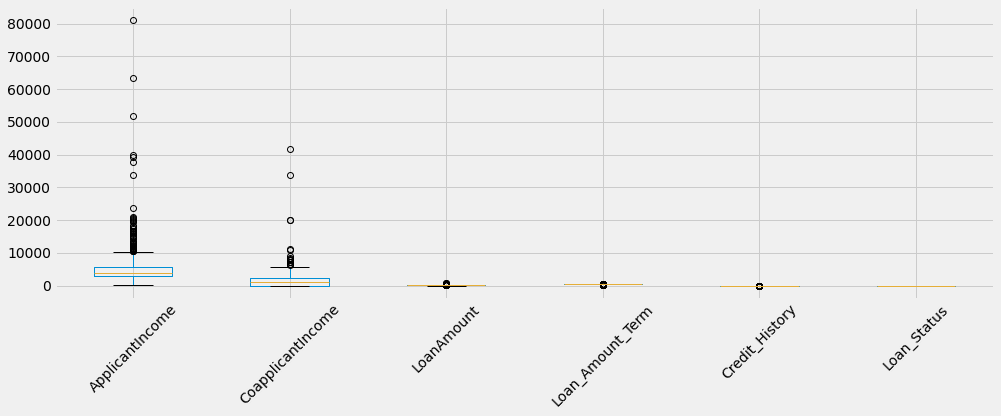

In [96]:
df.boxplot(rot=45)
plt.show()

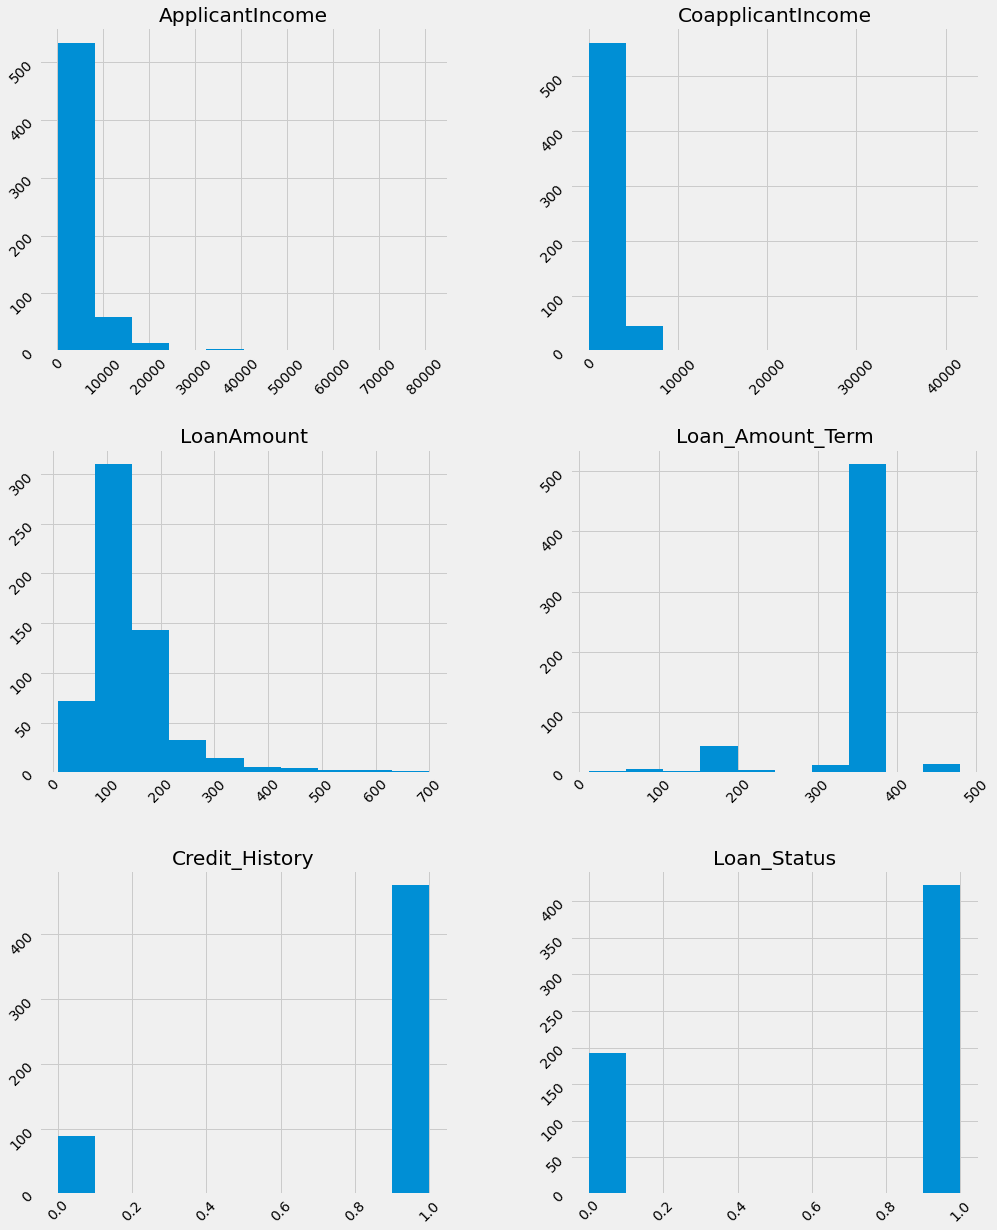

In [97]:
df.hist(figsize=(15,20),xrot=45,yrot=45)
plt.show()

In [98]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [99]:
df.duplicated().any()

False

In [100]:
df.duplicated().sum() 

0

In [101]:
df.isna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [102]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [103]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

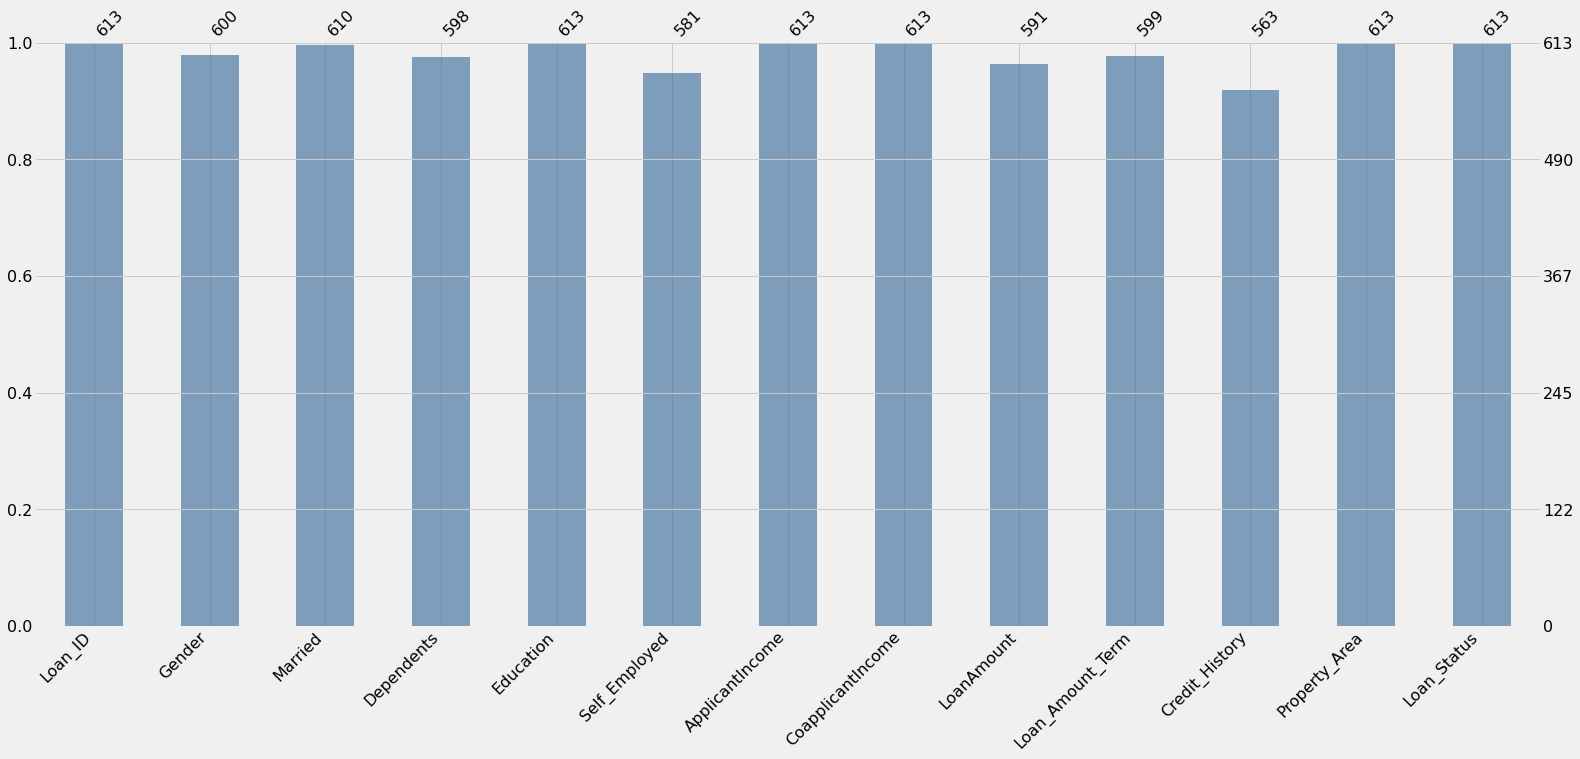

In [104]:
msno.bar(df.sample(613),color=(0.2, 0.4, 0.6, 0.6))
plt.show()

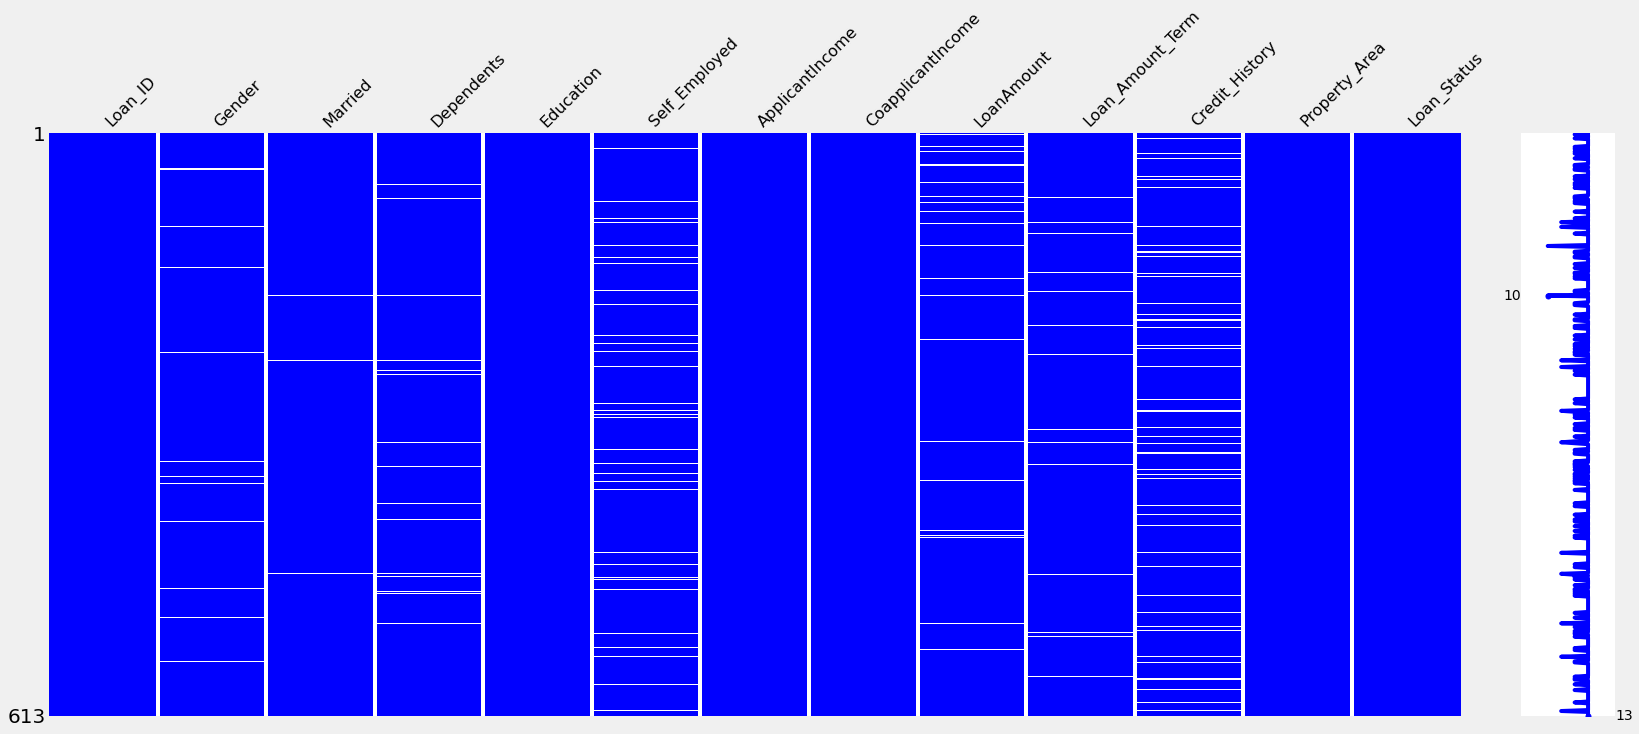

In [105]:
msno.matrix(df.sample(613),color=(0, 0, 1))
plt.show()

In [106]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

print("Number of Missing Values Left in the Training Data :", df.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


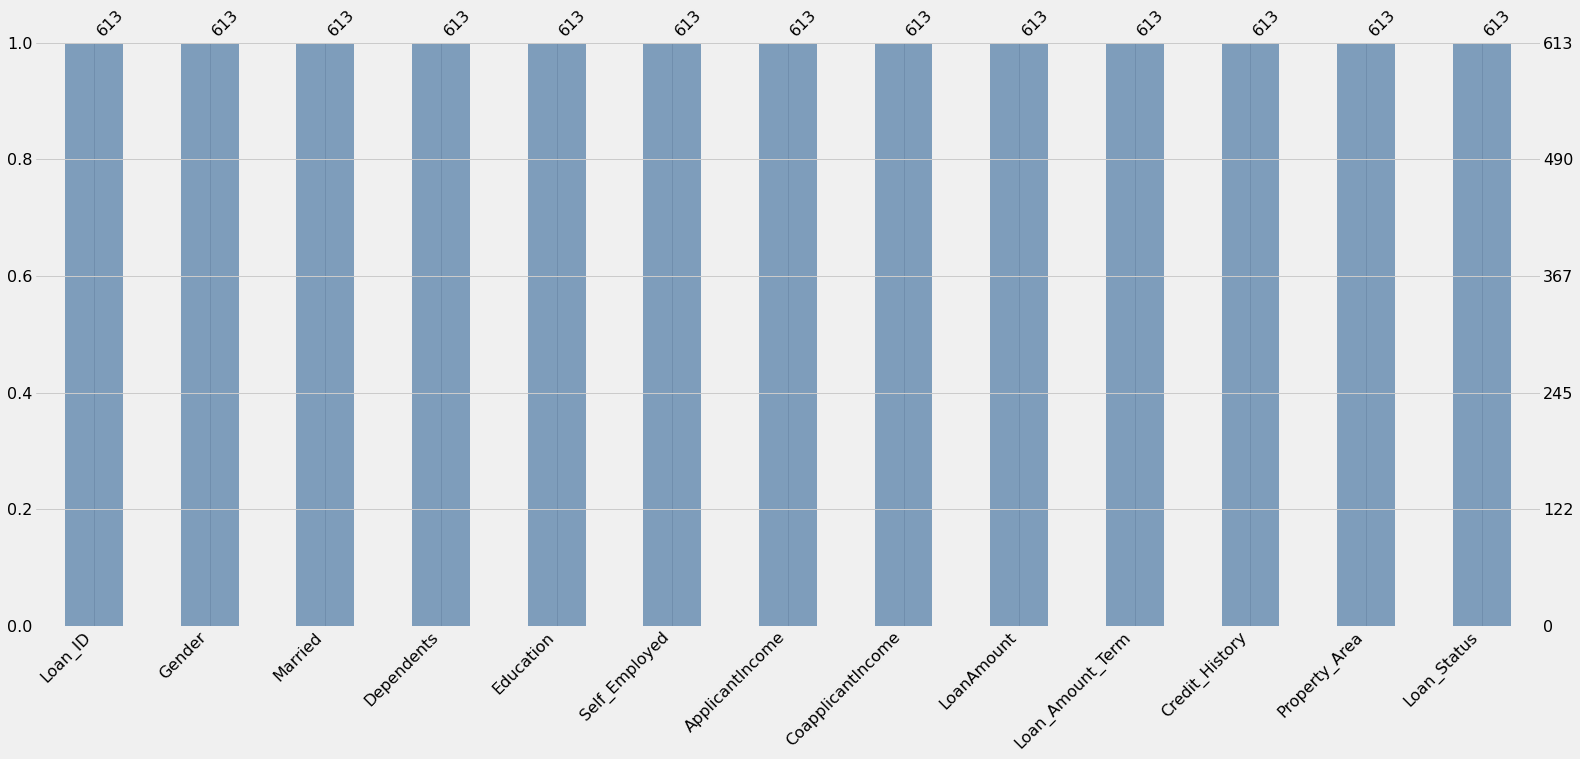

In [107]:
plt.rcParams['figure.figsize'] = (15, 5)

msno.bar(df.sample(613),color=(0.2, 0.4, 0.6, 0.6))
plt.show()

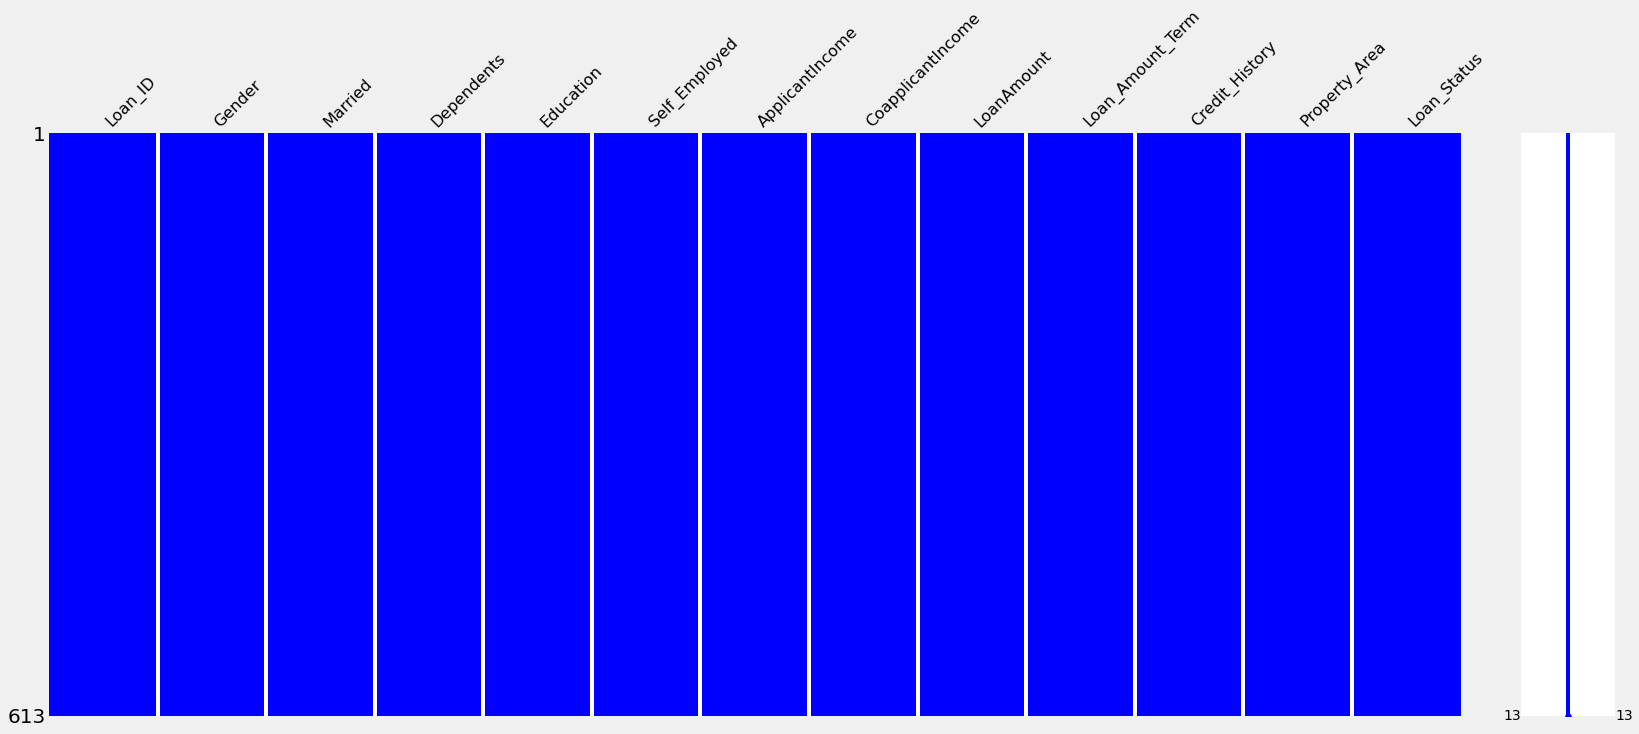

In [108]:
msno.matrix(df.sample(613),color=(0, 0, 1))
plt.show()

In [109]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.189723,-0.059383,0.011134,-0.059187
LoanAmount,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.031808
Loan_Amount_Term,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.022549
Credit_History,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.540556
Loan_Status,-0.004710,-0.059187,-0.031808,-0.022549,0.540556,1.000000


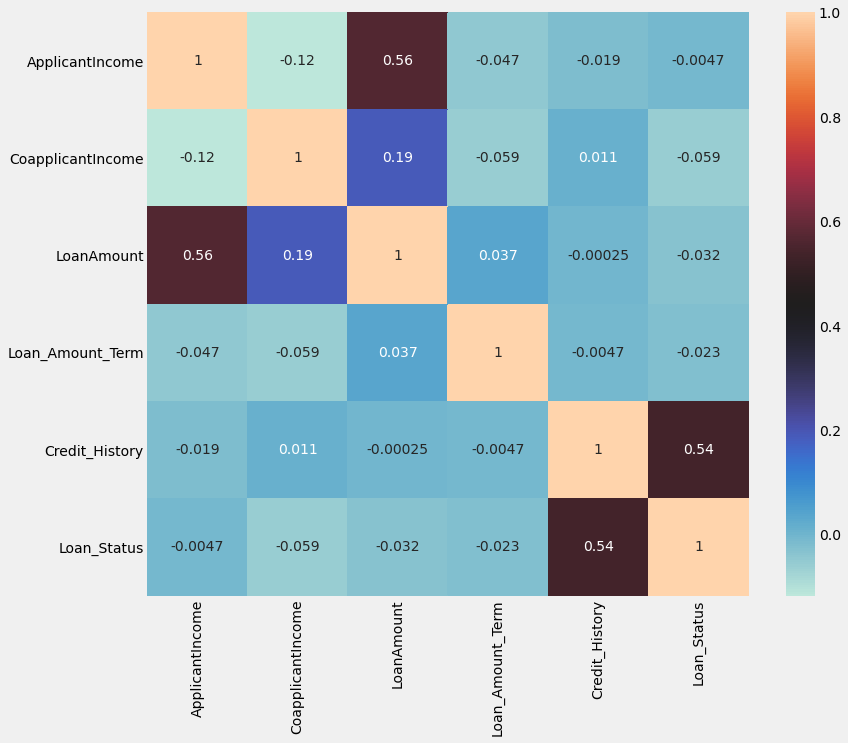

In [110]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), cmap='icefire', annot = True) 
plt.show()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.189723,-0.059383,0.011134,-0.059187
LoanAmount,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.031808
Loan_Amount_Term,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.022549
Credit_History,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.540556
Loan_Status,-0.004710,-0.059187,-0.031808,-0.022549,0.540556,1.000000


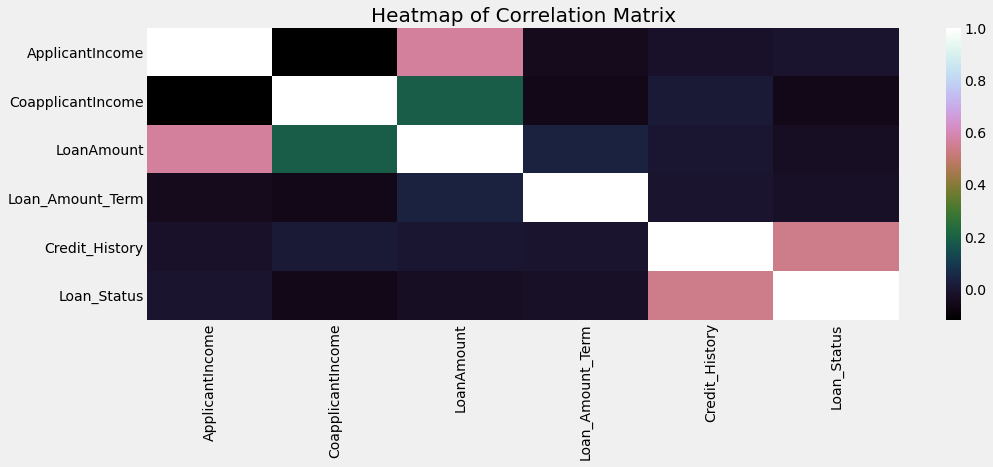

In [111]:
corr = df.corr()
sns.heatmap((corr),
xticklabels=corr.columns.values,
yticklabels=corr.columns.values,cmap='cubehelix',annot=False,fmt=".2g")
plt.title('Heatmap of Correlation Matrix', fontsize=20)
corr

In [112]:
df.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
0,5446.078125,1877.807292,149.432292,344.56250,0.572917
1,5384.068720,1504.516398,143.661137,341.43128,0.983412


In [113]:
df.groupby('Loan_Status').var()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
0,4.650638e+07,1.921998e+07,7000.749318,4651.158377,0.245964
1,3.324032e+07,3.704681e+06,7131.702002,3930.944197,0.016351


In [114]:
df.groupby('Loan_Status').std()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
0,6819.558528,4384.060103,83.670481,68.199402,0.495948
1,5765.441615,1924.754855,84.449405,62.697242,0.127872


In [115]:
df.groupby('Loan_Status').cov()

ApplicantIncome  ...  Credit_History
Loan_Status                                     ...                
0           ApplicantIncome       4.650638e+07  ...       27.148724
            CoapplicantIncome    -2.911128e+06  ...      164.467005
            LoanAmount            2.736819e+05  ...        3.908104
            Loan_Amount_Term      2.852603e+04  ...       -0.659031
            Credit_History        2.714872e+01  ...        0.245964
1           ApplicantIncome       3.324032e+07  ...      -62.680568
            CoapplicantIncome    -1.721667e+06  ...       -9.870274
            LoanAmount            2.985689e+05  ...       -1.041264
            Loan_Amount_Term     -3.966958e+04  ...        0.546363
            Credit_History       -6.268057e+01  ...        0.016351

[10 rows x 5 columns]

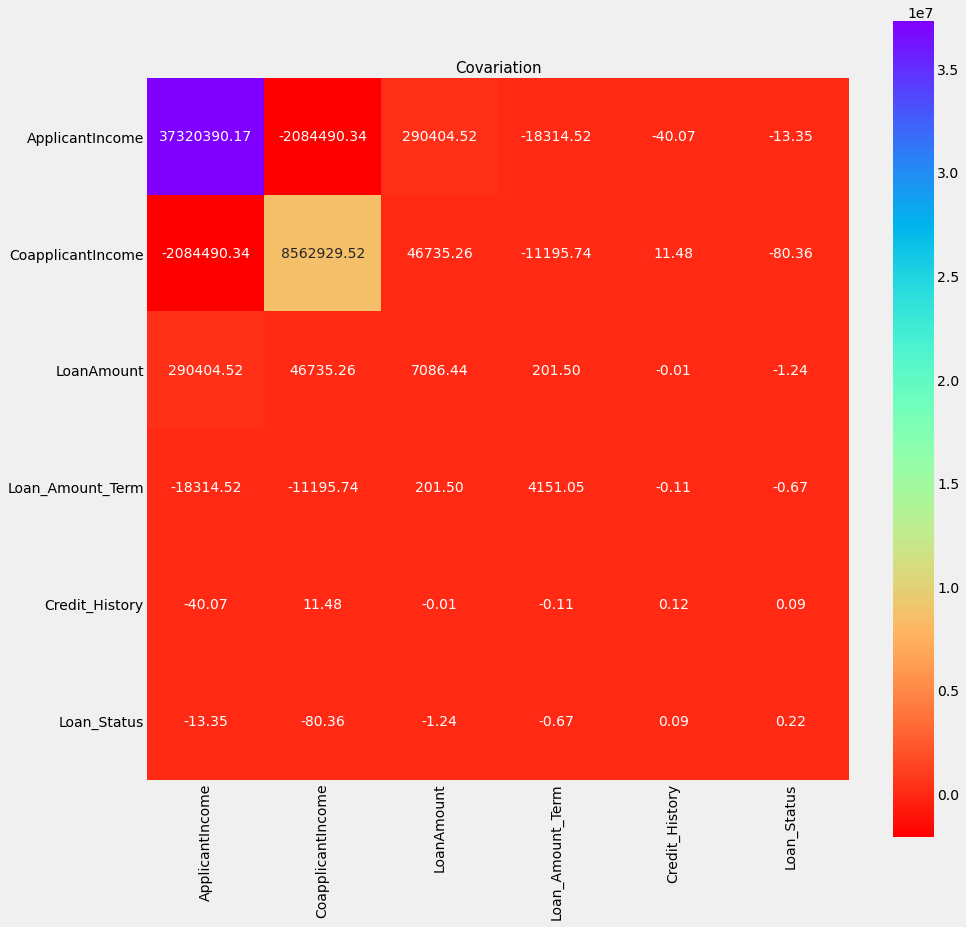

In [116]:
plt.figure(figsize=(14,14))
sns.heatmap(df.cov(), annot=True, fmt =".2f",square=True,cmap='rainbow_r')
plt.title("Covariation",fontsize = 15)
plt.show()

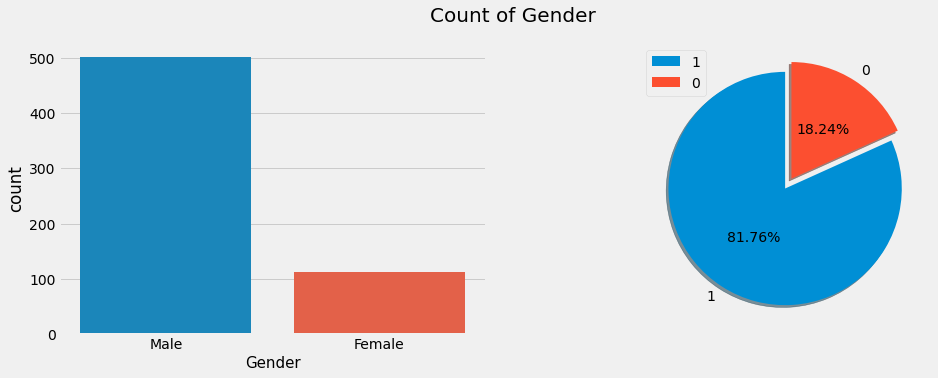

In [118]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(df['Gender'],)

plt.xlabel('Gender', fontsize = 15)

plt.subplot(1, 2, 2)
df['Gender'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Count of Gender', fontsize = 20)
plt.legend()
plt.show()

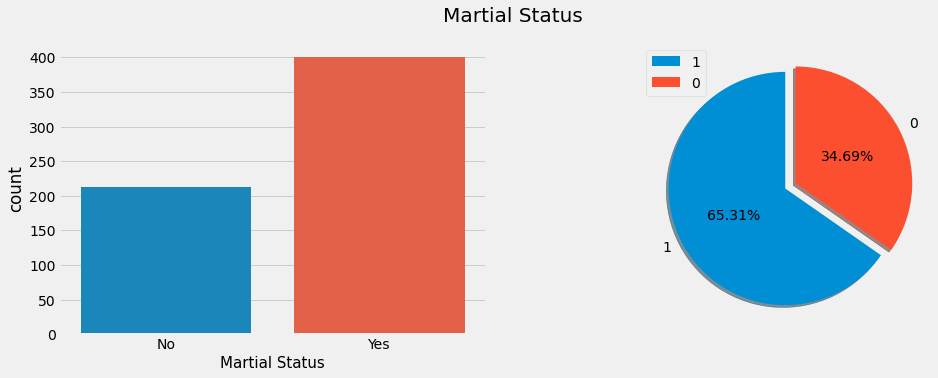

In [119]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(df['Married'],)

plt.xlabel('Martial Status', fontsize = 15)

plt.subplot(1, 2, 2)
df['Married'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Martial Status', fontsize = 20)
plt.legend()
plt.show()

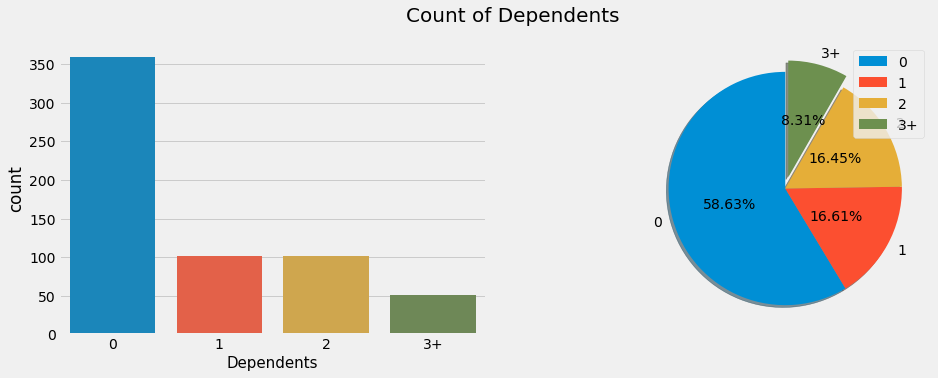

In [120]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(df['Dependents'],)

plt.xlabel('Dependents', fontsize = 15)

plt.subplot(1, 2, 2)
df['Dependents'].value_counts().plot(kind = 'pie', explode = [0, 0, 0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['0','1','2','3+'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Count of Dependents', fontsize = 20)
plt.legend()
plt.show()

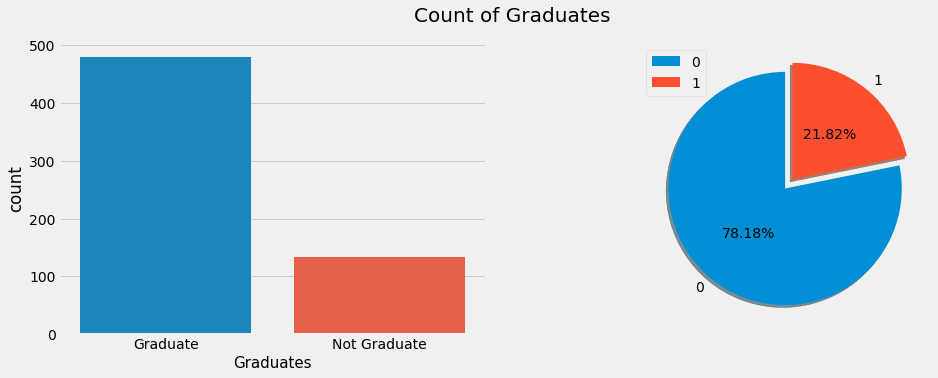

In [121]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(df['Education'],)

plt.xlabel('Graduates', fontsize = 15)

plt.subplot(1, 2, 2)
df['Education'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['0','1'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Count of Graduates', fontsize = 20)
plt.legend()
plt.show()

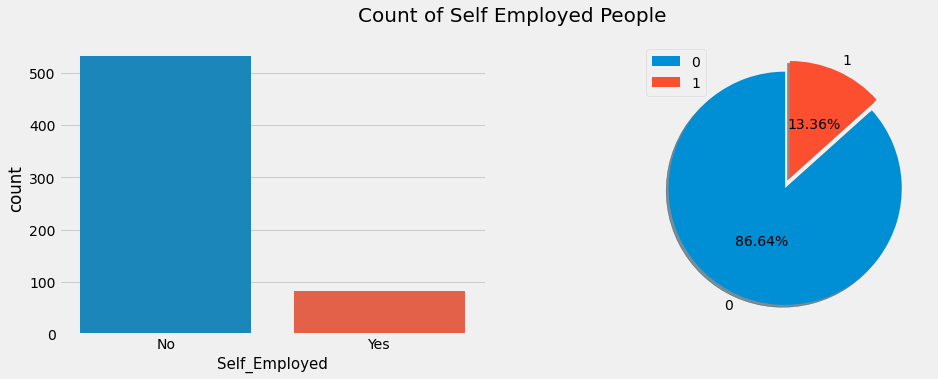

In [122]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(df['Self_Employed'],)

plt.xlabel('Self_Employed', fontsize = 15)

plt.subplot(1, 2, 2)
df['Self_Employed'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['0','1'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Count of Self Employed People', fontsize = 20)
plt.legend()
plt.show()

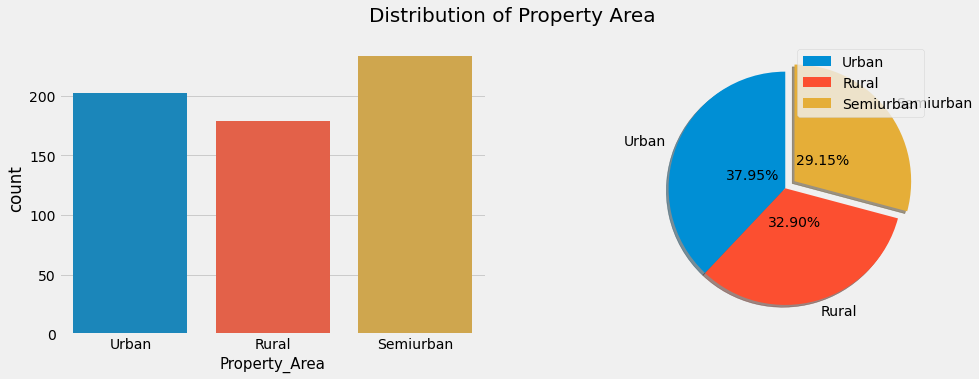

In [123]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(df['Property_Area'],)

plt.xlabel('Property_Area', fontsize = 15)

plt.subplot(1, 2, 2)
df['Property_Area'].value_counts().plot(kind = 'pie', explode = [0, 0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['Urban','Rural','Semiurban'], shadow = True, pctdistance = 0.3)
plt.axis('off')

plt.suptitle('Distribution of Property Area', fontsize = 20)
plt.legend()
plt.show()

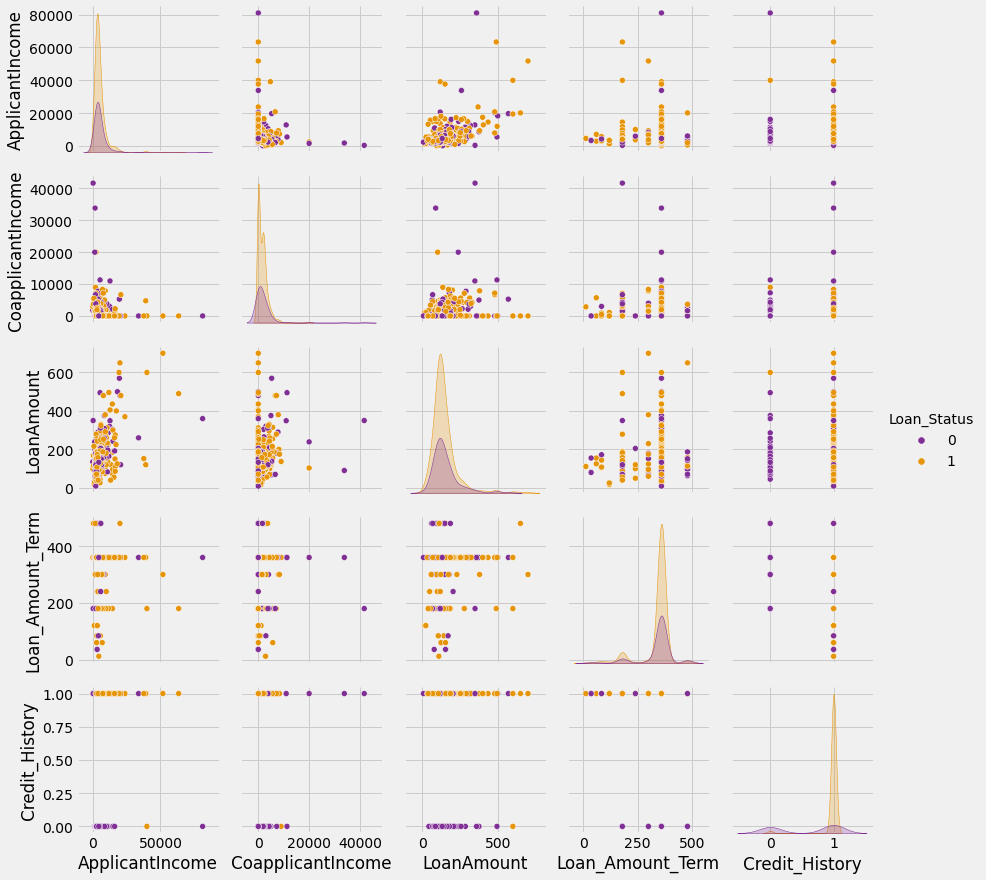

In [124]:
sns.pairplot(df, hue="Loan_Status", palette="CMRmap")
plt.show()

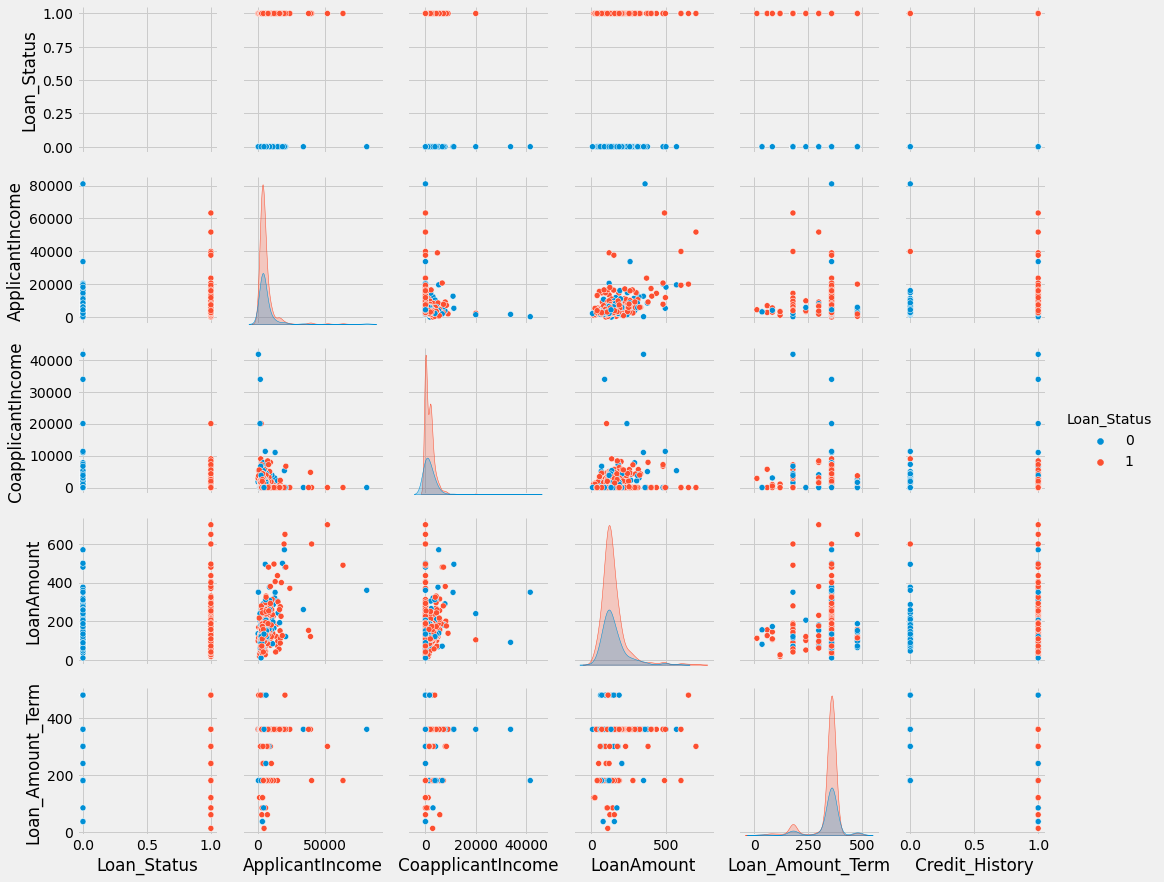

In [125]:
sns.pairplot(df,
             x_vars = [ 'Loan_Status', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'],
             y_vars = ['Loan_Status', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term' ],
       diag_kind='kde', hue='Loan_Status'
             )
plt.show()

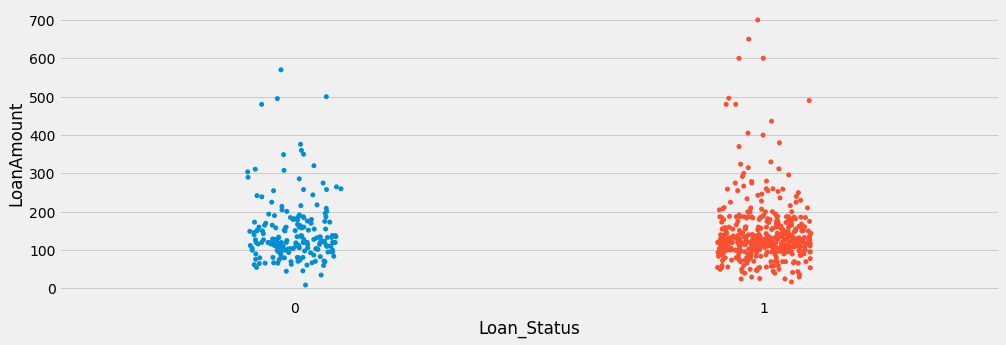

In [128]:
sns.stripplot(y='LoanAmount', x='Loan_Status', data=df)

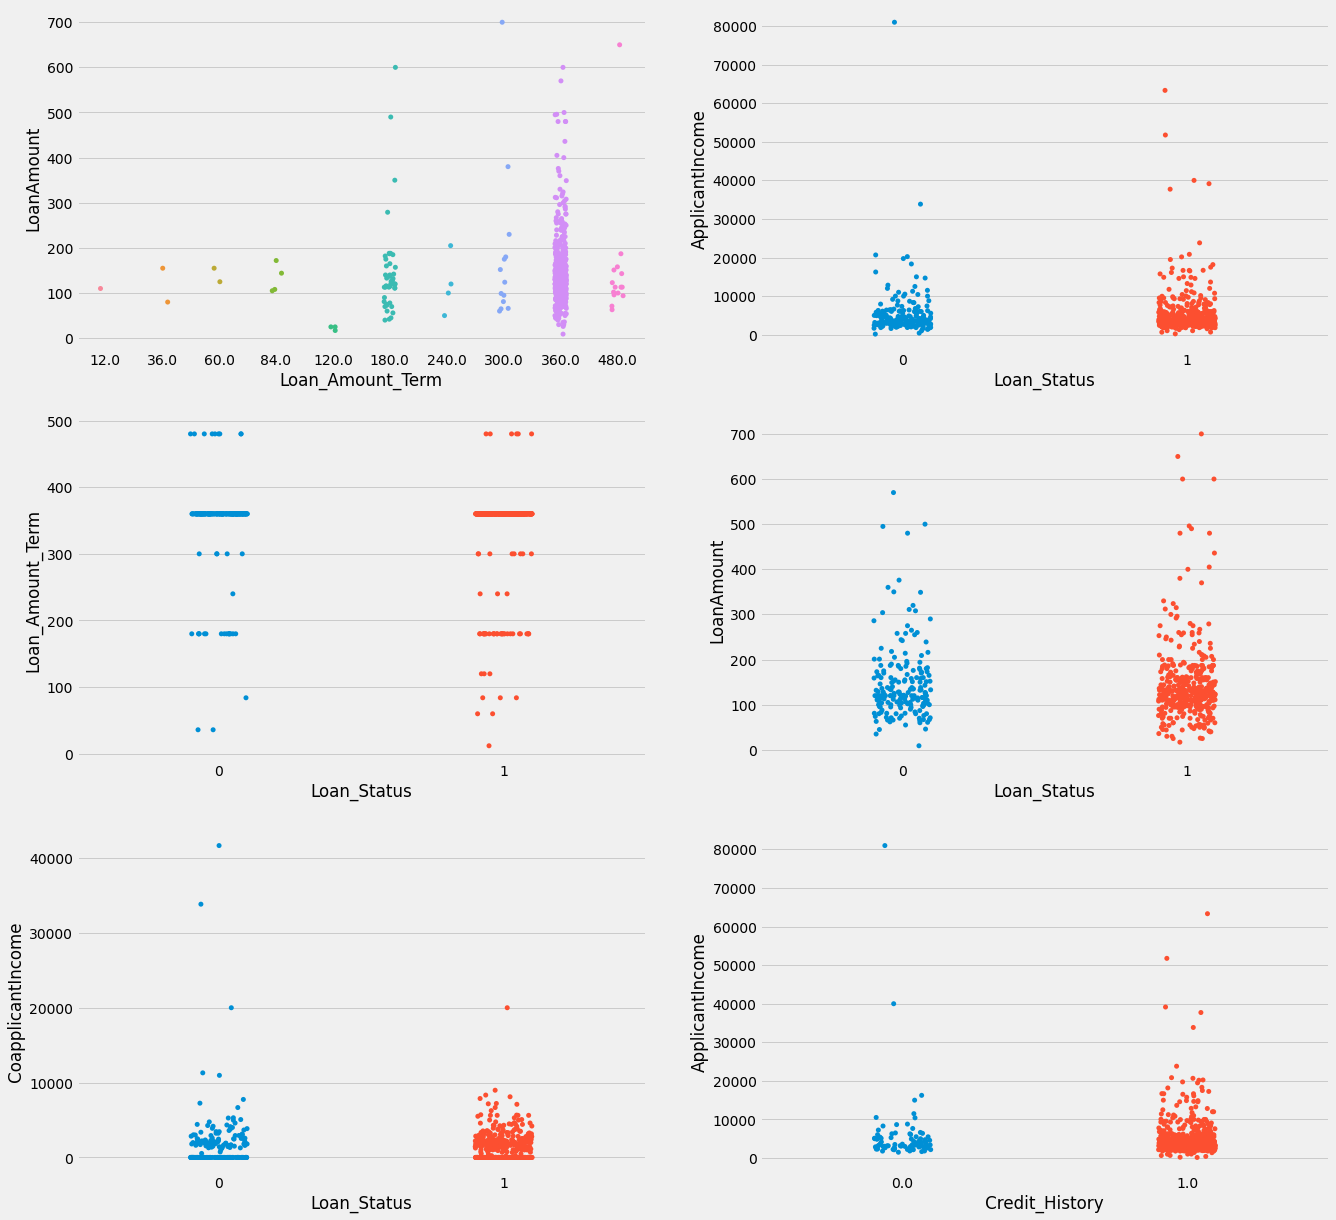

In [133]:
fig, axarr = plt.subplots(3,2, figsize=(20,20))

sns.stripplot(y='LoanAmount', x='Loan_Amount_Term', data=df, hue=None, ax=axarr[0][0])
sns.stripplot(y='LoanAmount', x='Loan_Status', data=df, hue=None, ax=axarr[1][1])
sns.stripplot(y='Loan_Amount_Term', x='Loan_Status', data=df, hue=None, ax=axarr[1][0])
sns.stripplot(y='ApplicantIncome', x='Loan_Status', data=df, hue=None,  ax=axarr[0][1])
sns.stripplot(y='CoapplicantIncome', x='Loan_Status', data=df, hue=None, ax=axarr[2][0])
sns.stripplot(y='ApplicantIncome', x='Credit_History', data=df, hue=None, ax=axarr[2][1])
plt.show()

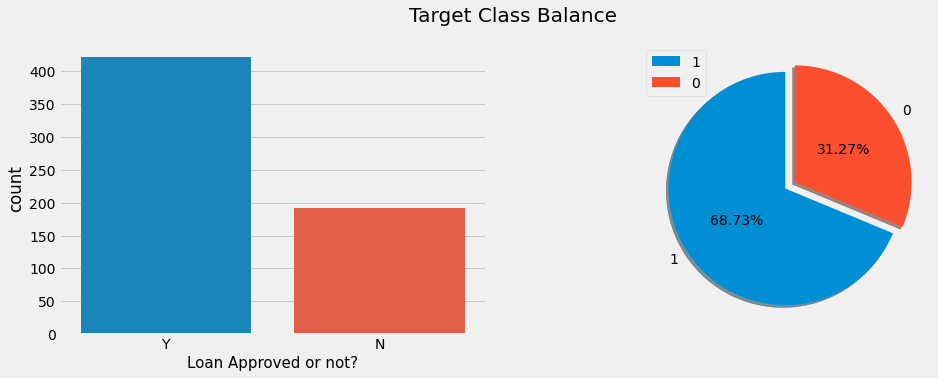

In [39]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(df['Loan_Status'],)

plt.xlabel('Loan Approved or not?', fontsize = 15)

plt.subplot(1, 2, 2)
df['Loan_Status'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 20)
plt.legend()
plt.show()

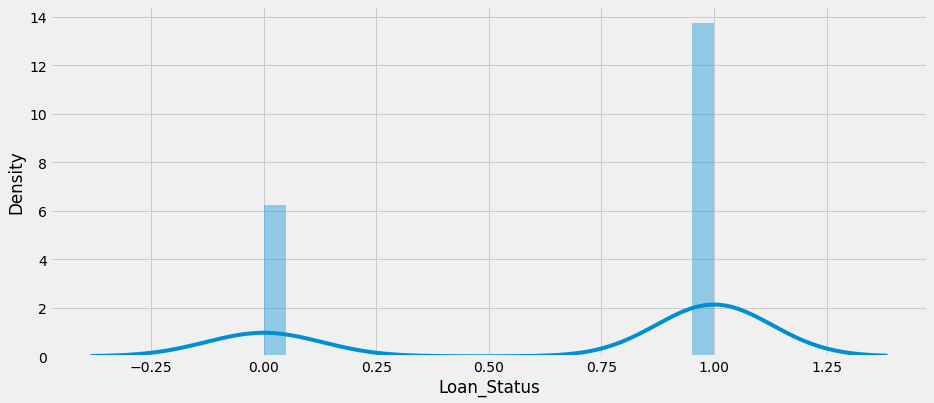

In [117]:
plt.figure(figsize = (14, 6)) 
plt.subplot(1,1,1)
sns.distplot(df["Loan_Status"], bins = 20)
plt.show()

In [144]:
df1 = df.select_dtypes('number').head(50)

In [145]:
x = df1.drop(columns='Loan_Status')
y = df1['Loan_Status']

In [146]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.33,random_state =9)

In [172]:
from sklearn.tree import DecisionTreeClassifier

In [178]:
clf = DecisionTreeClassifier(random_state=9,max_depth=5)

In [187]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')

In [180]:
pred = clf.predict(xtest)
print(pred)

[0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1]


In [181]:
from sklearn.metrics import accuracy_score,recall_score,f1_score

print("accuracy = ", accuracy_score(ytest, pred))
print("recall_score = ",recall_score(ytest, pred))
print("F1 score = ",f1_score(ytest, pred))

accuracy =  0.6470588235294118
recall_score =  0.75
F1 score =  0.75


Average precision-recall score: 0.7342609392241746 




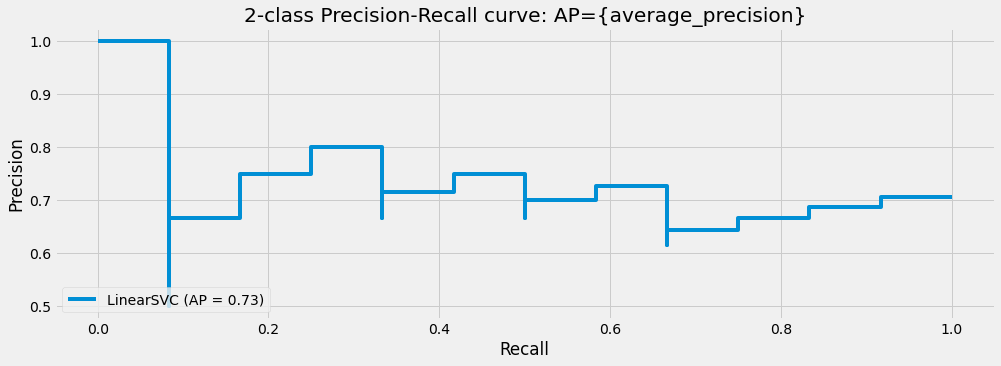

In [182]:
from sklearn import svm
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt


classifier = svm.LinearSVC(random_state=9)
classifier.fit(xtrain, ytrain)
score = classifier.decision_function(xtest)

average_precision = average_precision_score(ytest, score)

print(f'Average precision-recall score: {average_precision}', "\n\n")

disp = plot_precision_recall_curve(classifier, xtest, ytest)
disp.ax_.set_title(f'2-class Precision-Recall curve: '
                   'AP={average_precision}')
plt.show()

In [183]:
from sklearn.metrics import confusion_matrix

In [184]:
cn = confusion_matrix(ytest, pred) 
print(cn)

[[2 3]
 [3 9]]


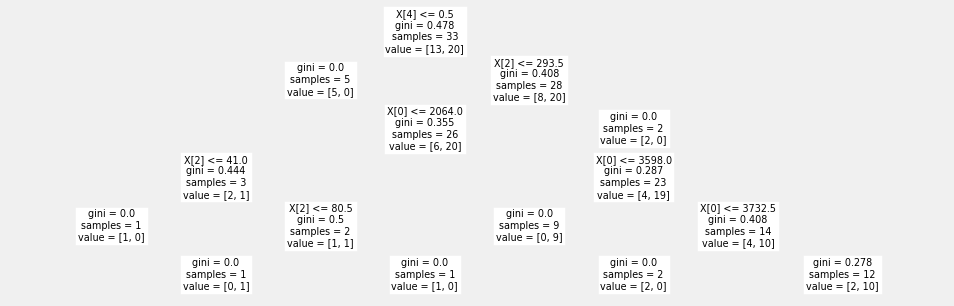

In [185]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()

In [189]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_4 <= 0.50
|   |--- class: 0
|--- feature_4 >  0.50
|   |--- feature_2 <= 293.50
|   |   |--- feature_0 <= 2064.00
|   |   |   |--- feature_2 <= 41.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  41.00
|   |   |   |   |--- feature_2 <= 80.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  80.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_0 >  2064.00
|   |   |   |--- feature_0 <= 3598.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  3598.00
|   |   |   |   |--- feature_0 <= 3732.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  3732.50
|   |   |   |   |   |--- class: 1
|   |--- feature_2 >  293.50
|   |   |--- class: 0



In [191]:
trclf = DecisionTreeClassifier(max_depth=5,min_samples_leaf = 55)
trclf.fit(xtrain,ytrain)
ypred = trclf.predict(xtest)
print("Test Accuracy: ",accuracy_score(ytest,ypred))
print("Test F1 Score: ",f1_score(ytest,ypred))
print("Confusion Matrix on Test Data")
pd.crosstab(ytest, ypred, rownames=['True'], colnames=['Predicted'], margins=True)


Test Accuracy:  0.7058823529411765
Test F1 Score:  0.8275862068965517
Confusion Matrix on Test Data


Predicted,1,All
True,,
0,5,5
1,12,12
All,17,17
